# Team: Kayla and Hariraj
# Dataset2 Ecommerce Data: A comprehensive Analysis
https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

# Preamble

In [4]:
# imports
import pandas as pd
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


# A. Exploration of Dataset

In [5]:
import pandas as pd

# Load the dataset
dataset_path = "ecommerceDataset.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(dataset_path, header=None)  # Specify header=None to indicate no column names

# Display the first few rows of the dataset to examine its structure
print("Dataset Structure:")
print(df.head())

# Check the number of samples, classes, and attributes
num_samples = df.shape[0]
num_classes = df.iloc[:, 0].nunique()  
num_attributes = 1  # Since there's only one column for product descriptions

print("\nNumber of Samples:", num_samples)
print("Number of Classes:", num_classes)
print("Number of Attributes:", num_attributes)

# Explore the distribution of classes
class_distribution = df.iloc[:, 0].value_counts()  
print("\nClass Distribution:")
print(class_distribution)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Explore the text data
text_data_sample = df.iloc[0, 1]  
print("\nExample Product Description:")
print(text_data_sample)

# Understand the nature of text data 
word_count = len(text_data_sample.split())
unique_words = len(set(text_data_sample.split()))

print("\nText Data Statistics:")
print("Word Count:", word_count)
print("Unique Words:", unique_words)


Dataset Structure:
           0                                                  1
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

Number of Samples: 50425
Number of Classes: 4
Number of Attributes: 1

Class Distribution:
0
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

Missing Values:
0    0
1    1
dtype: int64

Example Product Description:
Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall 

In [6]:

print("There are ", num_classes, 'possible classes and ', num_samples, 'samples')


There are  4 possible classes and  50425 samples


Identify missing values, and since there is a missing text entry, drop the row since there is no valid way to replace the information other than duplicating an entry.

In [7]:
# Check for missing values
missing_values = df.isnull()
total_missing_values = missing_values.sum().sum()
print("\nTotal Number of Missing Values:", total_missing_values)
print("\nMissing Values:")

# Display and drop rows with missing values
for index, row in missing_values.iterrows():
    if row.any():
        print(f"Missing value at row {index + 1}, dropping the entire row.")
        df = df.drop(index)

# Reset index after dropping rows
df = df.reset_index(drop=True)



Total Number of Missing Values: 1

Missing Values:
Missing value at row 39331, dropping the entire row.


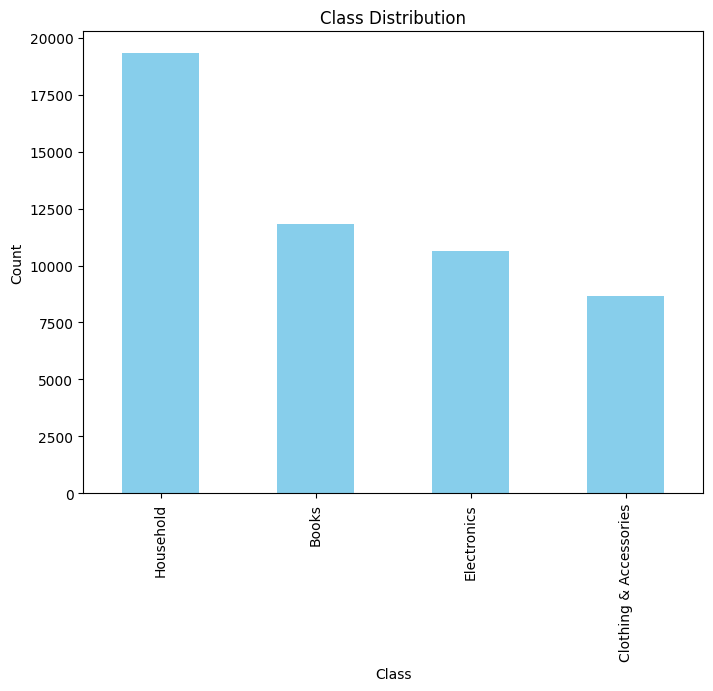

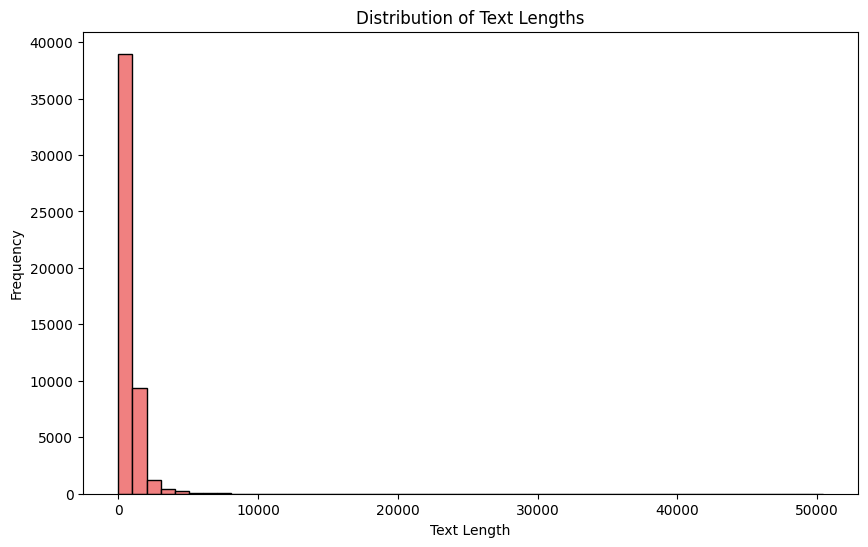

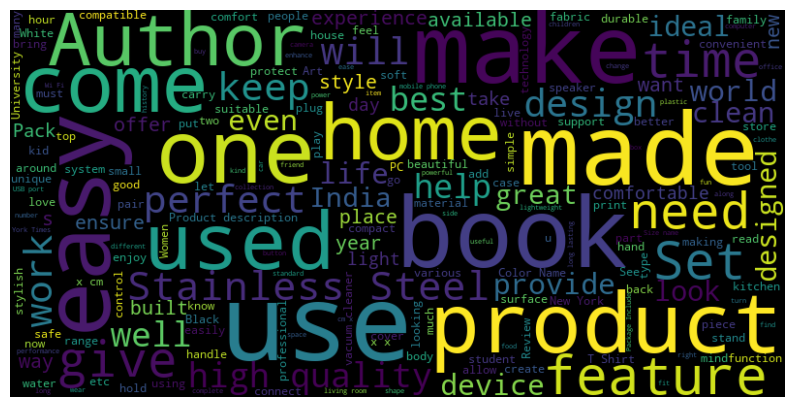

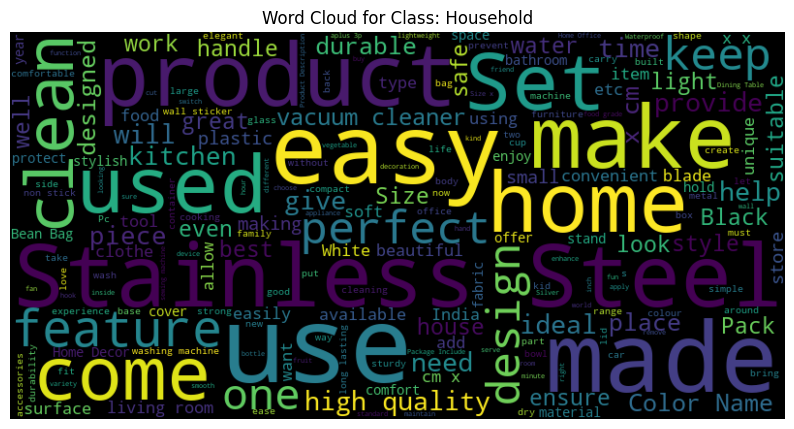

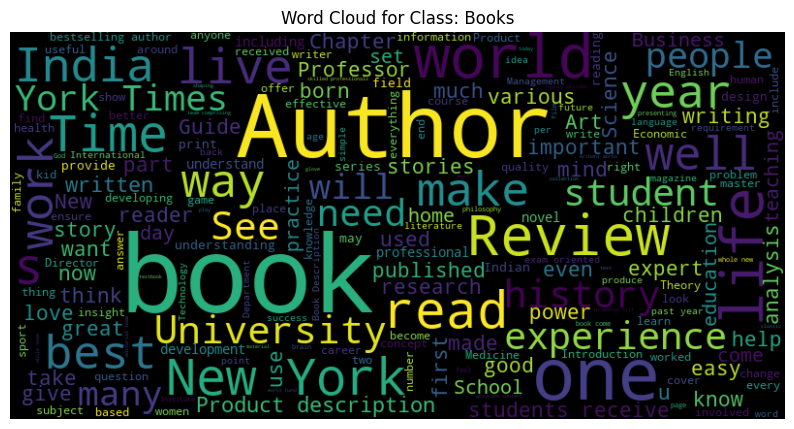

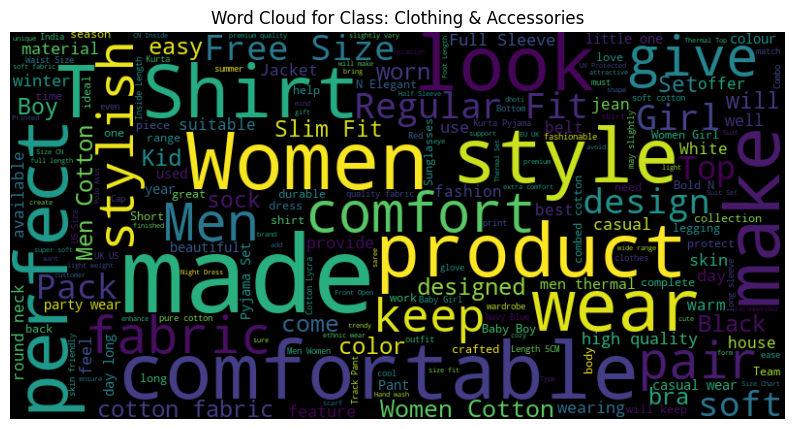

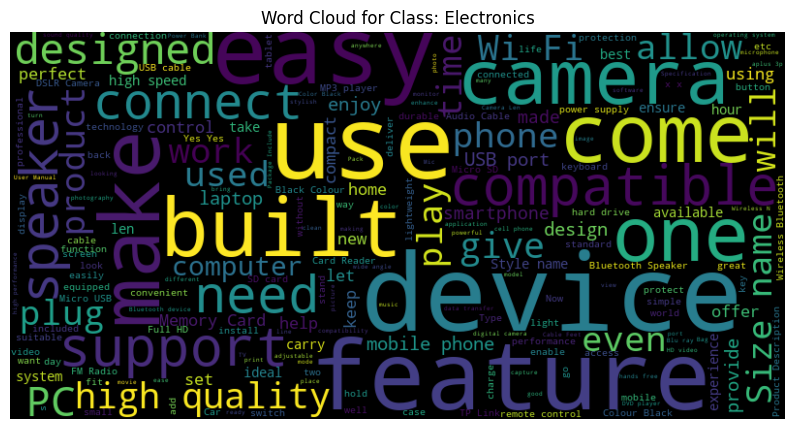

                          count        mean          std  min    25%    50%  \
0                                                                             
Books                   11820.0  857.007783  1624.798676  4.0   81.0  495.0   
Clothing & Accessories   8670.0  446.301153   393.459352  4.0  181.0  342.0   
Electronics             10621.0  851.107523   813.681965  9.0  293.0  630.0   
Household               19313.0  671.543779   606.382618  8.0  274.0  515.0   

                           75%      max  
0                                        
Books                   1064.0  50403.0  
Clothing & Accessories   568.0   3474.0  
Electronics             1222.0  12473.0  
Household                903.0  10168.0  


In [8]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 6))
df.iloc[:, 0].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Analyze text length
df['text_length'] = df.iloc[:, 1].apply(len)  # Assuming text is in the second column
plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


from wordcloud import WordCloud

# Word cloud for text entries
text_combined = ' '.join(df.iloc[:, 1].astype(str))  # Assuming text is in the second column
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_combined)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Word cloud for each class
classes = df.iloc[:, 0].unique()

for class_label in classes:
    text_combined_class = ' '.join(df[df.iloc[:, 0] == class_label].iloc[:, 1])
    wordcloud_class = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_combined_class)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_class, interpolation="bilinear")
    plt.title(f'Word Cloud for Class: {class_label}')
    plt.axis('off')
    plt.show()


# Summary statistics for text length based on each class
summary_stats = df.groupby(df.iloc[:, 0])['text_length'].describe()  # Assuming class information is in the first column
print(summary_stats)



According to the exploration of the dataset, we have learned that he dataset consists of 50,424 samples with 4 possible classes: "Household," "Books," "Electronics," and "Clothing & Accessories." There is one "attribute" in the dataset, representing the product descriptions from an e-commerce website. The class distribution shows that "Household" has the highest number of samples with 19,312, followed by "Books" with 11,820, "Electronics" with 10,621, and "Clothing & Accessories" with 8,671, which is a somewhat imbalanced spread since "Household" has far more samples than any other category. However, for the purpose of classification, this should not be a problem as logn as there is no drift between identifying which class each sample belongs to. Each text entry has 52 unique words on entry, reflecting a relatively diverse vocabulary, and the word cloud analysis shows us the most prominent words within each class. Presence of these words could be great indicators of class, with words like device or slim-fit being great indicators.

# B. Pre Processing of Dataset

We apply one hot encoding to fit numerical values to each of the 4 classes. 

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
dataset_path = "ecommerceDataset.csv"  
df = pd.read_csv(dataset_path, header=None)

# Perform one-hot encoding on the class column
onehot_encoder = OneHotEncoder(categories=[['Books', 'Clothing & Accessories', 'Electronics', 'Household']],
                                sparse=False)  
onehot_encoded = onehot_encoder.fit_transform(df.iloc[:, 0].values.reshape(-1, 1))

# Create new column names for the one-hot encoded columns
column_names = [f"{df.iloc[:, 0].name}_{col}" for col in onehot_encoder.get_feature_names_out()]

# Create a new DataFrame with one-hot encoded columns
onehot_df = pd.DataFrame(onehot_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df.iloc[:, 1], onehot_df], axis=1)

# Display the resulting DataFrame with one-hot encoded columns
print("Dataset with One-Hot Encoding:")
print(df.head())

# Assuming df is your DataFrame
nan_rows = df[df.isnull().any(axis=1)]

# Print rows containing NaN values
print("Rows containing NaN values:")
print(nan_rows)

df = df.dropna()

Dataset with One-Hot Encoding:
                                                   1  0_x0_Books  \
0  Paper Plane Design Framed Wall Hanging Motivat...         0.0   
1  SAF 'Floral' Framed Painting (Wood, 30 inch x ...         0.0   
2  SAF 'UV Textured Modern Art Print Framed' Pain...         0.0   
3  SAF Flower Print Framed Painting (Synthetic, 1...         0.0   
4  Incredible Gifts India Wooden Happy Birthday U...         0.0   

   0_x0_Clothing & Accessories  0_x0_Electronics  0_x0_Household  
0                          0.0               0.0             1.0  
1                          0.0               0.0             1.0  
2                          0.0               0.0             1.0  
3                          0.0               0.0             1.0  
4                          0.0               0.0             1.0  
Rows containing NaN values:
         1  0_x0_Books  0_x0_Clothing & Accessories  0_x0_Electronics  \
39330  NaN         0.0                          1.0      

c:\Users\17324\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


We apply stemming which "normalizes" the text entries and then we iterate through each stemmed token to make sure every word is lowercase, getting rid of punctuation etc. We then iterate back through the dataframe and replace entries with the stemmed entries. 

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import numpy as np


ps = PorterStemmer()

def preprocess_text(text):
    # Check for NaN values
    if isinstance(text, (float, np.float64)):
        return ''  # Return an empty string for NaN values
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Stemming
    tokens = [ps.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply the preprocessing function 
df.iloc[:, 0] = df.iloc[:, 0].apply(preprocess_text)

print(df.head())


                                                   1  0_x0_Books  \
0  paper plane design frame wall hang motiv offic...         0.0   
1  saf frame paint wood inch x inch special effec...         0.0   
2  saf textur modern art print frame paint synthe...         0.0   
3  saf flower print frame paint synthet inch x in...         0.0   
4  incred gift india wooden happi birthday uniqu ...         0.0   

   0_x0_Clothing & Accessories  0_x0_Electronics  0_x0_Household  
0                          0.0               0.0             1.0  
1                          0.0               0.0             1.0  
2                          0.0               0.0             1.0  
3                          0.0               0.0             1.0  
4                          0.0               0.0             1.0  


# Part C: Feature Extraction/Feature Learning

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Feature extraction
# BoW
vectorizer_bow = CountVectorizer(max_features=1000)
bow_features = vectorizer_bow.fit_transform(df.iloc[:, 0])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
tfidf_features = vectorizer_tfidf.fit_transform(df.iloc[:, 0])


last_column_index = df.shape[1] - 1
X = pd.concat([pd.DataFrame(bow_features.toarray()), pd.DataFrame(tfidf_features.toarray()), df.iloc[:, -1]], axis=1)
X = X.dropna()

# Use all OHE columns as the target variable
y = df[['0_x0_Books', '0_x0_Clothing & Accessories', '0_x0_Electronics', '0_x0_Household']]



print(X)



         0    1    2    3    4    5    6    7    8    9  ...  991  992  993  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
50419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50420  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50423  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

            994  995  996       997       998  999 

# Part D: Processing using two different machine learning method

Method 1: Using Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use StratifiedKFold for K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
rf_scores = cross_val_score(rf_model, X, y['0_x0_Household'], cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Random Forest Accuracy Scores:")
print(rf_scores)

# Display the mean accuracy and standard deviation
print(f"Mean Accuracy: {np.mean(rf_scores):.4f}")
print(f"Standard Deviation: {np.std(rf_scores):.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [50423, 50424]

Method 2: SVC

# Part E: Comparitive Analysis of the Two Methods

# Part F: Discussion on ethical issues

# Part G: Bibliography